<a href="https://colab.research.google.com/github/Payal-1607/Quantum-Mini-Project/blob/main/link1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**As usual since we are using google colab we must install qiskit**

In [28]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram

In [67]:
# Encrypt a message using a quantum circuit
def encrypt_message(message, key):
    # Determine the number of qubits needed
    num_qubits = len(key) + len(message)

    # Create a quantum circuit with the necessary qubits and classical bits
    qc = QuantumCircuit(num_qubits, len(key))

    # Apply gates based on the key to encrypt the message
    for i, bit in enumerate(key):
        if bit == '1':
            qc.x(i)

    # Apply controlled-X gates to encrypt the message
    for i, bit in enumerate(message):
        if bit == '1':
            qc.cx(i + len(key), i)

    # Measure the encrypted message
    qc.measure(list(range(len(key), len(key) + len(message))), list(range(len(message))))

    return qc

In [68]:
def decrypt_message(encrypted_message, key):
    # Create a quantum circuit with the necessary qubits and classical bits
    qc = QuantumCircuit(len(key) + len(encrypted_message), len(key))

    # Apply gates based on the key to decrypt the message
    for i, bit in enumerate(key):
        if bit == '1':
            qc.x(i)

    # Apply controlled-X gates to decrypt the message
    for i, bit in enumerate(encrypted_message):
        if bit == '1':
            qc.cx(i, i + len(key))

    # Measure the decrypted message
    qc.measure(list(range(len(key))), list(range(len(key))))

    return qc

Encrypted Message:
Decrypted Message:


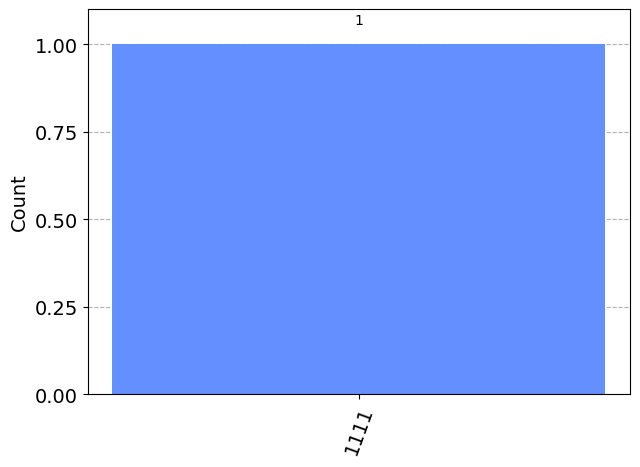

In [71]:
message = "1010"
key = "1111"

# Encrypt the message
encrypted_circuit = encrypt_message(message, key)

# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(encrypted_circuit, simulator, shots=1)
result = job.result()
encrypted_counts = result.get_counts(encrypted_circuit)

print("Encrypted Message:")
plot_histogram(encrypted_counts)

# Decrypt the encrypted message
decrypted_circuit = decrypt_message(list(encrypted_counts.keys())[0], key)

# Simulate the quantum circuit
job = execute(decrypted_circuit, simulator, shots=1)
result = job.result()
decrypted_counts = result.get_counts(decrypted_circuit)

print("Decrypted Message:")
plot_histogram(decrypted_counts)